In [2]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
my_data = pd.read_csv('../train_data.csv')

In [5]:
my_data.head()

,T,V,P,RH,E
0,273.39,420.12,91.84,57.41,1778.12
1,195.26,248.88,92.29,35.21,1824.16
2,377.52,360.42,92.31,27.69,1761.72
3,171.60,244.98,91.61,56.99,1889.64
4,222.56,353.70,92.43,54.25,1806.68


In [6]:
my_data = (my_data - my_data.mean())/my_data.std()
my_data.head()

,T,V,P,RH,E
0,0.182577,1.244001,-0.504386,1.509194,-0.584625
1,-0.638217,-1.000649,0.330276,-1.021259,0.106723
2,1.276514,0.461441,0.367372,-1.878422,-0.830892
3,-0.886777,-1.051771,-0.930992,1.461321,1.089986
4,-0.351417,0.373354,0.589949,1.149004,-0.155761


In [7]:
X = my_data.iloc[:,0:4]
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)

y = my_data.iloc[:,4:5].values
theta = np.zeros([1,5])

alpha = 0.01
iters = 2500

In [8]:
my_data.iloc[:,0:4]

,T,V,P,RH
0,0.182577,1.244001,-0.504386,1.509194
1,-0.638217,-1.000649,0.330276,-1.021259
2,1.276514,0.461441,0.367372,-1.878422
3,-0.886777,-1.051771,-0.930992,1.461321
4,-0.351417,0.373354,0.589949,1.149004
5,-1.909697,-1.014019,-1.691462,1.085172
6,-0.612269,-0.841777,1.406063,0.577942
7,-1.404383,-0.995930,1.053650,0.585921
8,-0.519400,-0.983346,0.960910,0.620116
9,1.052537,1.229844,-1.728558,0.196094


In [9]:
X

array([[ 1.        ,  0.18257687,  1.24400075, -0.50438644,  1.50919422],
       [ 1.        , -0.63821738, -1.00064895,  0.33027588, -1.02125901],
       [ 1.        ,  1.27651397,  0.46144068,  0.36737198, -1.87842155],
       ...,
       [ 1.        ,  0.35602258,  0.23493083, -1.15356825,  0.11402541],
       [ 1.        ,  0.40655401,  0.51649515,  0.73833301,  0.39784652],
       [ 1.        , -0.70923452, -0.03011716,  0.60849665, -0.73401837]])

In [10]:
def computeCost(X,y,theta):
    tobesummed = np.power(((X @ theta.T)-y),2)
    return np.sum(tobesummed)/(2 * len(X))

In [11]:
def gradientDescent(X,y,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
        cost[i] = computeCost(X, y, theta)
    
    return theta,cost

g,cost = gradientDescent(X,y,theta,iters,alpha)
print(g)

finalCost = computeCost(X,y,g)
print(finalCost)

[[-2.52747501e-14 -8.18853596e-01 -2.11301853e-01  2.39770473e-02
  -1.24340274e-01]]
0.0358202412850339


In [12]:
g,cost = gradientDescent(X,y,theta,iters,alpha)
print(g)
finalCost = computeCost(X,y,g)
print(finalCost)

[[-2.52747501e-14 -8.18853596e-01 -2.11301853e-01  2.39770473e-02
  -1.24340274e-01]]
0.0358202412850339


In [13]:
cost

array([0.47942269, 0.46005288, 0.44159496, ..., 0.03582065, 0.03582045,
       0.03582024])

Text(0, 0.5, 'Cost')

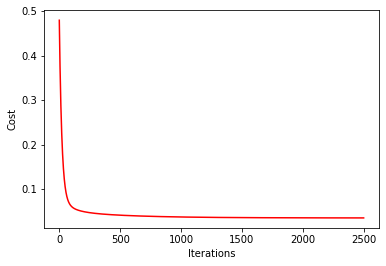

In [14]:
fig, ax = plt.subplots()  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost') 

In [15]:
theta

array([[0., 0., 0., 0., 0.]])